<a href="https://colab.research.google.com/github/sayarghoshroy/Intro_to_DL_tutorial/blob/master/PCA_and_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sc
from scipy.stats import f
import matplotlib.pyplot as plt

# $Data$

In [2]:
set_A = [[189, 245, 137, 163],
        [192, 260, 132, 217],
        [217, 276, 141, 192],
        [221, 299, 142, 213],
        [171, 239, 128, 158],
        [192, 262, 147, 173],
        [213, 278, 136, 201],
        [192, 255, 128, 185],
        [170, 244, 128, 192],
        [201, 276, 146, 186],
        [195, 242, 128, 192],
        [205, 263, 147, 192],
        [180, 252, 121, 167],
        [192, 283, 138, 183],
        [200, 287, 136, 173],
        [192, 277, 150, 177],
        [200, 287, 136, 173],
        [181, 255, 146, 183],
        [192, 287, 141, 198]]

set_B = [[181, 305, 184, 209],
        [158, 237, 133, 188],
        [184, 300, 166, 231],
        [171, 273, 162, 213],
        [181, 297, 163, 224],
        [181, 308, 160, 223],
        [177, 301, 166, 221],
        [198, 308, 141, 197],
        [180, 286, 146, 214],
        [177, 299, 171, 192],
        [176, 317, 166, 213],
        [192, 312, 166, 209],
        [176, 285, 141, 200],
        [169, 287, 162, 214],
        [164, 265, 147, 192],
        [181, 308, 157, 204],
        [192, 276, 154, 209],
        [181, 278, 149, 235],
        [175, 271, 140, 192],
        [197, 303, 170, 205]]

n_A = len(set_A)
n_B = len(set_B)
set_A = np.asmatrix(set_A)
set_B = np.asmatrix(set_B)

mean_A = np.mean(set_A, axis = 0)
mean_B = np.mean(set_B, axis = 0)

data = np.vstack([set_A, set_B])
mean = np.mean(data, axis = 0)

print('Number of datapoints: ')
print('- In class A: ' + str(n_A))
print('- In class B: ' + str(n_B))
print('- Total: ' + str(data.shape[0]))

store_figures = False
fontsize = 16

Number of datapoints: 
- In class A: 19
- In class B: 20
- Total: 39


# $Principal\ Component\ Analysis$

In [3]:
# Performing Principal Component Analysis

covariance_matrix = np.cov(data.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

order = np.argsort(-1 * eigen_values)

# Dataset Visualization
# Considering only the first two principal components

print("Principal Eigen Value:", np.round(eigen_values[order[0]], 4))
print("Principal Eigen Vector:", 
      np.ndarray.tolist(np.round(eigen_vectors[:, order[0]], 4)))
print()

print("Secondary Eigen Value:", np.round(eigen_values[order[1]], 4))
print("Secondary Eigen Vector:", 
      np.ndarray.tolist(np.round(eigen_vectors[:, order[1]], 4)))

Principal Eigen Value: 821.9183
Principal Eigen Vector: [-0.0184, -0.7272, -0.4332, -0.5322]

Secondary Eigen Value: 242.9598
Secondary Eigen Vector: [-0.8048, -0.3858, 0.1673, 0.4188]


In [4]:
# For class A
x_A = np.ravel(np.matmul(eigen_vectors[:, order[0]], set_A.T))
y_A = np.ravel(np.matmul(eigen_vectors[:, order[1]], set_A.T))

# For class B
x_B = np.ravel(np.matmul(eigen_vectors[:, order[0]], set_B.T))
y_B = np.ravel(np.matmul(eigen_vectors[:, order[1]], set_B.T))

# Converting data formats
x_A = np.ndarray.tolist(x_A)
y_A = np.ndarray.tolist(y_A)
x_B = np.ndarray.tolist(x_B)
y_B = np.ndarray.tolist(y_B)

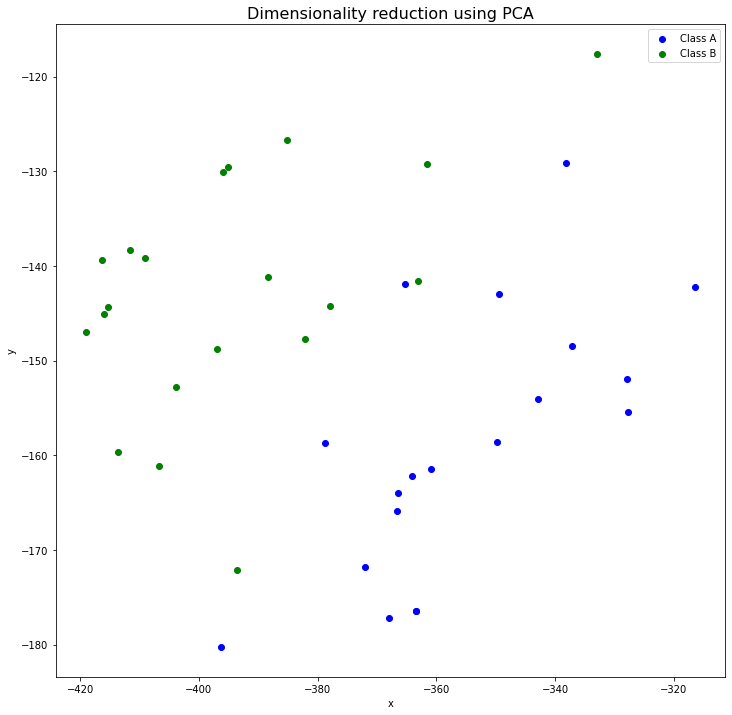

In [5]:
# Visualizing dimensionality reduction due to PCA
if store_figures == True:
  plt.figure(figsize = (10, 10))
else:
  plt.figure(figsize = (12, 12))

fig = plt.subplot(111)
fig.set_title('Dimensionality reduction using PCA', fontsize = fontsize)
fig.set_xlabel('x')
fig.set_ylabel('y')

data_A = fig.scatter(x_A, y_A, color = 'blue', label = 'Class A')
data_B = fig.scatter(x_B, y_B, color = 'green', label = 'Class B')
plt.legend()
if store_figures == True:
  plt.savefig('PCA.png')
plt.show()

In [6]:
# Significance of Principal Components based on
# eigenvalues of the S matrix

ordered_values = eigen_values[order]
total = np.sum(ordered_values)
contrib = (ordered_values * 100) / total

print('Significance of Principal Components based on eigenvalues of the S matrix')
print()

for index in range(contrib.shape[0]):
  print('Eigenvalue = ' + str(np.round(ordered_values[index], 4)) + ', ', end = '')
  print('Percentage Contribution = ' + str(np.round(contrib[index], 4)) + ' %')

Significance of Principal Components based on eigenvalues of the S matrix

Eigenvalue = 821.9183, Percentage Contribution = 64.8212 %
Eigenvalue = 242.9598, Percentage Contribution = 19.1612 %
Eigenvalue = 147.9856, Percentage Contribution = 11.671 %
Eigenvalue = 55.1134, Percentage Contribution = 4.3466 %


# $Linear\ Discriminant\ Analysis$

## $Within-class\ scatter\ matrix\ S_W$

$S_W\ =\ \sum_{i = 1}^{c}S_i$

$where$

- $S_i\ =\ \sum_{x \in C_i}^{n}(x - m_i)(x - m_i)^T$

- $C_i\ denotes\ the\ set\ of\ datapoints\ in\ the\ i^{th}\ class$

- $n_i\ =\ |C_i|$

- $C\ denotes\ the\ collection\ of\ all\ classes$

- $n\ represents\ the\ total\ number\ of\ datapoints\ across\ all\ classes$

    $i.e.\ n\ =\ \sum_{i = 1}^{|C|}n_i$

- $m_i\ =\ \frac{1}{n_i} \sum_{x \in C_i}^{n_i}x$

## $Between-class\ scatter\ matrix\ S_B$

$S_B\ =\ \sum_{i = 1}^{|C|}n_i(m_i - m)(m_i - m)^T$

$where$

- $m\ =\ \frac{1}{n}\sum_{i = 1}^{n}x_i$


## $Solving\ a\ generalized\ eigenvalue\ problem$

$Let\ A\ =\ S_W^{-1}S_B$

$Generalized\ eigenvalue\ problem:\ Av\ =\ \lambda v $

$where$
- $(\lambda,\ v)\ is\ a\ solution\ eigenvalue,\ eigenvector\ pair$

In [7]:
# Performing Fisher's Linear Discriminant Analysis

S_A = np.cov(set_A.T)
S_B = np.cov(set_B.T)

S_W = S_A + S_B

unit_A = mean_A - mean
unit_B = mean_B - mean

S_B = n_A * np.matmul(unit_A.T, unit_A) + n_B * np.matmul(unit_B.T, unit_B)

covariance_matrix = np.real(np.matmul(np.linalg.inv(S_W), S_B))
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

eigen_values = np.real(eigen_values)
eigen_vectors = np.real(eigen_vectors)

order = np.argsort(-1 * eigen_values)

# Dataset Visualization
# Considering only the first two principal components

primary = np.ravel(eigen_vectors[:, order[0]].T)
secondary = np.ravel(eigen_vectors[:, order[1]].T)

print("Maximum eigen value of matrix A:", np.round(eigen_values[order[0]], 4))
print("Principal Linear Discriminant:", 
      np.ndarray.tolist(np.round(primary, 4)))
print()

print("Second largest eigen value of matrix A:", np.round(eigen_values[order[1]], 4))
print("Secondary Linear Discriminant:", 
      np.ndarray.tolist(np.round(secondary, 4)))

Maximum eigen value of matrix A: 69.3985
Principal Linear Discriminant: [0.8414, -0.3429, -0.2365, -0.3444]

Second largest eigen value of matrix A: 0.0
Secondary Linear Discriminant: [-0.9351, -0.2249, -0.1551, -0.2258]


In [8]:
# For class A
x_A = np.ravel(np.matmul(eigen_vectors[:, order[0]].T, set_A.T))
y_A = np.ravel(np.matmul(eigen_vectors[:, order[1]].T, set_A.T))

# For class B
x_B = np.ravel(np.matmul(eigen_vectors[:, order[0]].T, set_B.T))
y_B = np.ravel(np.matmul(eigen_vectors[:, order[1]].T, set_B.T))

# Converting data formats
x_A = np.ndarray.tolist(x_A)
y_A = np.ndarray.tolist(y_A)
x_B = np.ndarray.tolist(x_B)
y_B = np.ndarray.tolist(y_B)

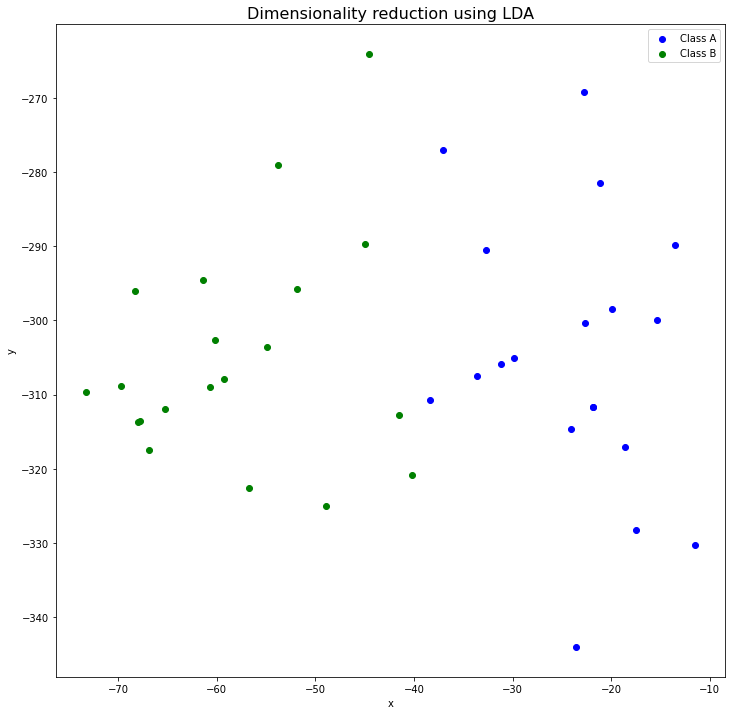

In [9]:
# Visualizing dimensionality reduction due to LDA
if store_figures == True:
  plt.figure(figsize = (10, 10))
else:
  plt.figure(figsize = (12, 12))

fig = plt.subplot(111)
fig.set_title('Dimensionality reduction using LDA', fontsize = fontsize)
fig.set_xlabel('x')
fig.set_ylabel('y')

data_A = fig.scatter(x_A, y_A, color = 'blue', label = 'Class A')
data_B = fig.scatter(x_B, y_B, color = 'green', label = 'Class B')
plt.legend()

if store_figures == True:
  plt.savefig('LDA.png')
plt.show()

In [10]:
# Significance of Linear Discriminants based on
# eigenvalues of the A matrix

ordered_values = eigen_values[order]
total = np.sum(ordered_values)
contrib = (ordered_values * 100) / total

print('Significance of Linear Discriminants based on eigenvalues of the A matrix')
print()

for index in range(contrib.shape[0]):
  print('Eigenvalue = ' + str(np.round(ordered_values[index], 14)) + ', ', end = '')
  print('Percentage Contribution = ' + str(np.round(contrib[index], 14)) + ' %')

Significance of Linear Discriminants based on eigenvalues of the A matrix

Eigenvalue = 69.39849481007302, Percentage Contribution = 99.99999999999999 %
Eigenvalue = 1e-14, Percentage Contribution = 1e-14 %
Eigenvalue = 0.0, Percentage Contribution = 0.0 %
Eigenvalue = 0.0, Percentage Contribution = 0.0 %


# $Conclusion$

- $ LDA\ ensures\ much\ better\ class\ separability\ compared\ to\ PCA.$

# $LDA\ for\ classification$

In [11]:
def classifier_score(point):
  score = np.ravel(np.matmul(eigen_vectors[:, order[0]].T, point.T))
  return score

def point_of_separation(A_scores, B_scores):
  higher_class = A_scores
  lower_class = B_scores

  A_mean = np.mean(A_scores)
  B_mean = np.mean(B_scores)

  if B_mean > A_mean:
    higher_class = B_scores
    lower_class = A_scores

  critical_points = [np.min(higher_class), np.max(lower_class)]
  separation = np.mean(critical_points)

  return separation

Threshold for separation = -39.3105311774346


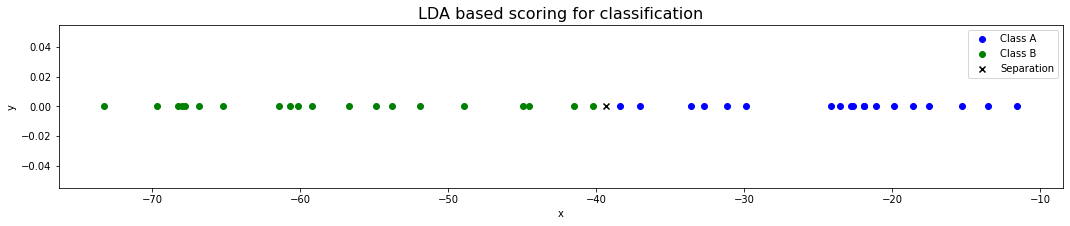

In [12]:
A_scores = np.ravel(np.matmul(eigen_vectors[:, order[0]].T, set_A.T))
B_scores = np.ravel(np.matmul(eigen_vectors[:, order[0]].T, set_B.T))

separation = point_of_separation(A_scores, B_scores)
print('Threshold for separation = ' + str(separation))

# Visualizing LDA based scoring for classification
if store_figures == True:
  plt.figure(figsize = (16, 3))
else:
  plt.figure(figsize = (18, 3))

fig = plt.subplot(111)
fig.set_title('LDA based scoring for classification', fontsize = fontsize)
fig.set_xlabel('x')
fig.set_ylabel('y')

data_A = fig.scatter(A_scores, [0 for index in range(len(A_scores))], color = 'blue', label = 'Class A')
data_B = fig.scatter(B_scores, [0 for index in range(len(B_scores))], color = 'green', label = 'Class B')
divide = fig.scatter([separation], [0], marker = 'x', color = 'black', label = 'Separation')

plt.legend()

if store_figures == True:
  plt.savefig('LDA_classify.png')
plt.show()

### $Exercise$:

#### $Use\ sklearn\ to\ implement\ PCA\ and\ LDA\ in\ all\ of\ the\ above\ settings.$

In [13]:
# ^_^ Thank You